In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error

import matplotlib.pyplot as plt

import sklearn.preprocessing as skl_pre
import sklearn.linear_model as skl_lm
import sklearn.discriminant_analysis as skl_da
import sklearn.model_selection as skl_ms

import sys
sys.path.append('../src')

print(sys.executable)

from data_preprocessing import df, df_scaled, X, y, X_scaled


In [ ]:
df_head = df.head()
df_scaled_head = df_scaled.head()
print(df_head)


   holiday  weekday  summertime  temp   dew  humidity  precip  windspeed  \
0        0        0           0  -7.2 -15.0     53.68     0.0       16.3   
1        0        1           0  -1.3 -12.8     40.97     0.0       23.9   
2        0        1           1  26.9  21.8     73.39     0.0        0.0   
3        0        0           0   3.1  -4.0     59.74     0.0       19.2   
4        0        1           0  11.7 -11.4     18.71     0.0       10.5   

   cloudcover  visibility  ... hour_of_the_day_sin  hour_of_the_day_cos  \
0        31.6        16.0  ...            0.965926             0.258819   
1        85.7        16.0  ...           -0.707107             0.707107   
2        81.1        16.0  ...           -0.707107             0.707107   
3         0.0        16.0  ...            0.258819             0.965926   
4        44.6        16.0  ...           -0.965926            -0.258819   

   day_0  day_1  day_2  day_3  day_4  day_5  day_6  snow_or_not  
0  False  False  False  Fa

In [98]:
#print(df_scaled_head)
print('x scaled ', X_scaled.head())


x scaled      holiday   weekday  summertime      temp       dew  humidity    precip  \
0 -0.185094 -1.564697   -1.344254 -2.419627 -2.269781 -0.537283 -0.132609   
1 -0.185094  0.639101   -1.344254 -1.782607 -2.050293 -1.203654 -0.132609   
2 -0.185094  0.639101    0.743907  1.262128  1.401656  0.496090 -0.132609   
3 -0.185094 -1.564697   -1.344254 -1.307542 -1.172340 -0.219564 -0.132609   
4 -0.185094  0.639101   -1.344254 -0.379006 -1.910618 -2.370721 -0.132609   

   windspeed  cloudcover  visibility  ...  hour_of_the_day_sin  \
0   0.414935   -0.999503    0.282338  ...             1.371739   
1   1.395045    0.652979    0.282338  ...            -1.013450   
2  -1.687144    0.512472    0.282338  ...            -1.013450   
3   0.788924   -1.964724    0.282338  ...             0.363639   
4  -0.333044   -0.602419    0.282338  ...            -1.382440   

   hour_of_the_day_cos     day_0     day_1     day_2     day_3     day_4  \
0             0.367380 -0.420084 -0.389754 -0.402425 -

In [36]:
print('x', X.head())

x    holiday  weekday  summertime  temp   dew  humidity  precip  windspeed  \
0        0        0           0  -7.2 -15.0     53.68     0.0       16.3   
1        0        1           0  -1.3 -12.8     40.97     0.0       23.9   
2        0        1           1  26.9  21.8     73.39     0.0        0.0   
3        0        0           0   3.1  -4.0     59.74     0.0       19.2   
4        0        1           0  11.7 -11.4     18.71     0.0       10.5   

   cloudcover  visibility  ...  hour_of_the_day_sin  hour_of_the_day_cos  \
0        31.6        16.0  ...             0.965926             0.258819   
1        85.7        16.0  ...            -0.707107             0.707107   
2        81.1        16.0  ...            -0.707107             0.707107   
3         0.0        16.0  ...             0.258819             0.965926   
4        44.6        16.0  ...            -0.965926            -0.258819   

   day_0  day_1  day_2  day_3  day_4  day_5  day_6  snow_or_not  
0  False  False  F

LDA assumes that the covarainces are the same across classes. If this assumption is violated, QDA may perform better. However, QDA is more prone to overfitting, especially with small sample sizes, because it estimates a separate covariance matrix for each class.

In [37]:
#compare covariances between classes
#scale to be able to interpret the results
from sklearn.preprocessing import StandardScaler

labels = y.unique()
cov1 = X_scaled[y == labels[0]].cov()
cov2 = X_scaled[y == labels[1]].cov()

diff = cov1 - cov2
fro_norm = np.linalg.norm(diff)  # storleken på skillnaden
#print(f"Frobeniusnormen av skillnaden mellan {labels[0]} och {labels[1]}: {fro_norm:.2f}")

    holiday   weekday  summertime      temp       dew  humidity    precip  \
0 -0.185094 -1.564697   -1.344254 -2.419627 -2.269781 -0.537283 -0.132609   
1 -0.185094  0.639101   -1.344254 -1.782607 -2.050293 -1.203654 -0.132609   
2 -0.185094  0.639101    0.743907  1.262128  1.401656  0.496090 -0.132609   
3 -0.185094 -1.564697   -1.344254 -1.307542 -1.172340 -0.219564 -0.132609   
4 -0.185094  0.639101   -1.344254 -0.379006 -1.910618 -2.370721 -0.132609   

   windspeed  cloudcover  visibility  ...  hour_of_the_day_sin  \
0   0.414935   -0.999503    0.282338  ...             1.371739   
1   1.395045    0.652979    0.282338  ...            -1.013450   
2  -1.687144    0.512472    0.282338  ...            -1.013450   
3   0.788924   -1.964724    0.282338  ...             0.363639   
4  -0.333044   -0.602419    0.282338  ...            -1.382440   

   hour_of_the_day_cos     day_0     day_1     day_2     day_3     day_4  \
0             0.367380 -0.420084 -0.389754 -0.402425 -0.399275 -

try out models with differnt adjustments on data

In [79]:
df1 = df.copy()
#square root the windspeed since it is right skewed
df1['windspeed_squared'] = np.sqrt(df1['windspeed'])
X_1 = df1.drop('increase_stock', axis=1)
X_1_scaled = skl_pre.StandardScaler().fit_transform(X_1)
X_1 = pd.DataFrame(X_1, columns=X_1.columns)
X_1_scaled = pd.DataFrame(X_1_scaled, columns=X_1.columns)
df1_lda = lda(df1, X_1, y, X_1_scaled)
print(df1_lda)


unscaled: 0.1438, scaled: 0.1438


LDA without k-fold cross-validation, unscaled and scaled

In [80]:
def lda(df, X, y, X_scaled):
    model = skl_da.LinearDiscriminantAnalysis()
    train_indexes, test_indices = skl_ms.train_test_split(range(len(X)), test_size=0.2, random_state=42)
    X_train, X_test = X.iloc[train_indexes], X.iloc[test_indices]
    y_train, y_test = y.iloc[train_indexes], y.iloc[test_indices]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = np.mean(y_pred == y_test)
    error = 1 - accuracy
    

    X_train, X_test = X_scaled.iloc[train_indexes], X_scaled.iloc[test_indices]
    y_train, y_test = y.iloc[train_indexes], y.iloc[test_indices]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = np.mean(y_pred == y_test)
    error_scaled = 1 - accuracy
    return f"unscaled: {error:.4f}, scaled: {error_scaled:.4f}"
print(lda(df, X, y, X_scaled))

unscaled: 0.1438, scaled: 0.1438


LDA with k-fold cross-validation, scaled and unsaled

In [68]:
def lda_kfold(df, X, X_scaled):
  model = skl_da.LinearDiscriminantAnalysis()
  n_folds = 10
  cv = skl_ms.KFold(n_splits=n_folds, shuffle=True, random_state=0)

  errors_folded = []
  for train_index, val_index in cv.split(df):
    x_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    model.fit(x_train, y_train)
    folded_accuracy = model.score(X_val, y_val)
    error = 1 - folded_accuracy
    errors_folded.append(error)
  mean_error = np.mean(errors_folded)

  errors_folded_scaled = []
  for train_index, val_index in cv.split(df):
    x_train, X_val = X_scaled.iloc[train_index], X_scaled.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    model.fit(x_train, y_train)
    folded_accuracy = model.score(X_val, y_val)
    error = 1 - folded_accuracy
    errors_folded_scaled.append(error)
  mean_error_scaled = np.mean(errors_folded_scaled)
  return f"unscaled: {mean_error:.4f}, scaled: {mean_error_scaled:.4f}"
print(lda_kfold(df, X, X_scaled))

unscaled: 0.1369, scaled: 0.1369


QDA without k-fold cross-validation, unscaled and scaled

In [67]:
def qda(df, X, X_scaled):
    model = skl_da.QuadraticDiscriminantAnalysis(reg_param=0.6) # makes model more stabel by adding more weight to the diagonal of the covariance matrix. Less accurate

    train_indexes, test_indices = skl_ms.train_test_split(range(len(X)), test_size=0.2, random_state=42)
    X_train, X_test = X.iloc[train_indexes], X.iloc[test_indices]
    y_train, y_test = y.iloc[train_indexes], y.iloc[test_indices]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = np.mean(y_pred == y_test)
    error_unscaled = 1 - accuracy

    X_train, X_test = X_scaled.iloc[train_indexes], X_scaled.iloc[test_indices]
    y_train, y_test = y.iloc[train_indexes], y.iloc[test_indices]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = np.mean(y_pred == y_test)
    error_scaled = 1 - accuracy
    return f"unscaled: {error_unscaled:.4f}, scaled: {error_scaled:.4f}"
print(qda(df, X, X_scaled))

unscaled: 0.1937, scaled: 0.1656


QDA with k-fold cross-validation, unscaled and scaled

In [66]:

def qda_kfold(df, X, X_scaled):
    model = skl_da.QuadraticDiscriminantAnalysis(reg_param=0.6) # makes model more stabel by adding more weight to the diagonal of the covariance matrix. Less accurate
    n_folds = 10
    cv = skl_ms.KFold(n_splits=n_folds, shuffle=True, random_state=0)

    errors_folded_qda = []
    for train_index, val_index in cv.split(df):
        x_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]
        model.fit(x_train, y_train)
        folded_accuracy = model.score(X_val, y_val)
        error = 1 - folded_accuracy
        errors_folded_qda.append(error)
    mean_error_qda = float(np.mean(errors_folded_qda))
    #print(f"Mean error across {n_folds} folds, unscaled: {mean_error:.4f}")

    errors_folded_qda_scaled = []
    for train_index, val_index in cv.split(df):
        x_train, X_val = X_scaled.iloc[train_index], X_scaled.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]
        model.fit(x_train, y_train)
        folded_accuracy = model.score(X_val, y_val)
        error = 1 - folded_accuracy
        errors_folded_qda_scaled.append(error)
    mean_error_qda_scaled = float(np.mean(errors_folded_qda_scaled))
   # print(f"Mean error across {n_folds} folds, scaled: {mean_error:.4f}")

    return f"unscaled: {mean_error_qda:.4f}, scaled: {mean_error_qda_scaled:.4f}"

print(qda_kfold(df, X, X_scaled))

unscaled: 0.1725, scaled: 0.1425


lda: unscaled: 0.1438, scaled: 0.1438, qda: unscaled: 0.1969, scaled: 0.1656, qda_kfold: unscaled: 0.1719, scaled: 0.1437, lda_kfold: unscaled: 0.1381, scaled: 0.1381


<Axes: >

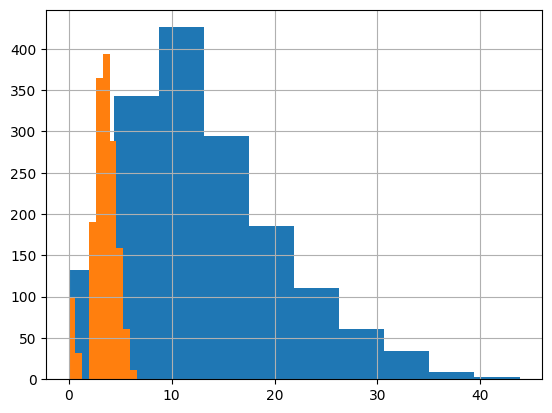

In [ ]:
df1 = df.copy()
resuts = {}
#square root the windspeed since it is right skewed

df1['windspeed_squared'] = np.sqrt(df1['windspeed'])
X_1 = df1.drop('increase_stock', axis=1)
X_1_scaled = skl_pre.StandardScaler().fit_transform(X_1)
X_1 = pd.DataFrame(X_1, columns=X_1.columns)
X_1_scaled = pd.DataFrame(X_1_scaled, columns=X_1.columns)

df2['']


df1_lda = lda(df1, X_1, y, X_1_scaled)
df1_qda = qda(df1, X_1, X_1_scaled)
df1_qda_kfold = qda_kfold(df1, X_1, X_1_scaled)
df1_lda_kfold = lda_kfold(df1, X_1, X_1_scaled)
print(f"lda: {df1_lda}, qda: {df1_qda}, qda_kfold: {df1_qda_kfold}, lda_kfold: {df1_lda_kfold}")
df.windspeed.hist()
df1.windspeed_squared.hist()
